# 🚀 Introdução ao LangGraph - Hello World

Bem-vindo! Neste notebook, você aprenderá os conceitos fundamentais do LangGraph de forma prática e didática.

## O que vamos aprender?
1. **Conceitos básicos**: O que é um grafo computacional?
2. **TypedDict vs Pydantic**: Diferenças e quando usar cada um
3. **Estado em LangGraph**: Como definir e gerenciar estado
4. **Seu primeiro workflow**: Um exemplo prático passo a passo

---

In [ ]:
# Importações Necessárias
# TypedDict: Para definir estruturas de dados de forma tipada
# StateGraph: A base para criar grafos em LangGraph
# Image, display: Para visualizar os grafos criados

from typing import Dict, TypedDict
from langgraph.graph import StateGraph
from IPython.display import Image, display

print("✅ Todas as bibliotecas importadas com sucesso!")

## 📚 Entendendo TypedDict vs Pydantic

### O que é TypedDict?
**TypedDict** é uma forma **nativa do Python** (módulo `typing`) para descrever a estrutura de um dicionário:
- ✅ Simples e leve
- ✅ Sem dependências externas
- ✅ Perfeito para scripts e prototipagem rápida
- ⚠️ Validação é feita em tempo de desenvolvimento (type checking), não em tempo de execução

### O que é Pydantic?
**Pydantic** é uma biblioteca que fornece validação de dados em tempo de execução:
- ✅ Validação automática em runtime
- ✅ Mensagens de erro detalhadas
- ✅ Conversão de tipos automática
- ⚠️ Adiciona uma dependência externa
- ⚠️ Um pouco mais overhead de processamento

### Comparação Visual

```
TypedDict (Lightweight):
┌─────────────────────────┐
│ type State = TypedDict  │
│ - Simples              │
│ - Nativo do Python    │
│ - Sem validação       │
└─────────────────────────┘

Pydantic (Robusto):
┌─────────────────────────┐
│ class State(BaseModel)  │
│ - Validação completa   │
│ - Conversão de tipos   │
│ - Melhor para produção │
└─────────────────────────┘
```

**Para este tutorial**: Usaremos **TypedDict** por sua simplicidade!

## 🔧 Passo 1: Definir o Estado da Aplicação

Em LangGraph, o **estado** é a informação compartilhada entre os nós do seu grafo.

**O que precisa fazer?**
- Defina QUAIS dados sua aplicação vai usar
- Use `TypedDict` para estruturar esses dados
- Cada campo deve ter um tipo claro

**Exemplo do nosso caso:**
- `values`: Uma lista de números que queremos processar
- `name`: O nome do usuário
- `result`: Onde armazenaremos o resultado da operação

In [ ]:
# Definindo o Estado usando TypedDict
class agentState(TypedDict):
    """
    Estrutura de dados que representa o estado compartilhado do grafo.
    
    Atributos:
        values (list[int]): Lista de números para processar
        name (str): Nome para personalizar a mensagem
        result (str): Armazenaremos o resultado aqui
    """
    values: list[int]
    name: str
    result: str

# ℹ️ TypedDict define a FORMA dos dados, não valida em runtime
print("✅ Estado (agentState) definido com sucesso!")

In [ ]:
## 🔧 Passo 2: Criar Nós (Funções que Processam o Estado)

A função abaixo é um **nó** do grafo - ela recebe o estado, processa e retorna o estado atualizado.

def process_values(state: agentState) -> agentState:
    """
    Processa os valores recebidos no estado.
    
    O que faz:
    1. Recebe o estado atual (com values e name)
    2. Calcula a soma dos valores
    3. Cria uma mensagem personalizada
    4. Atualiza o estado com o resultado
    5. Retorna o estado modificado
    
    Args:
        state (agentState): Estado atual do grafo
        
    Returns:
        agentState: Estado com o campo 'result' preenchido
    """
    # Processamento: somar os valores
    soma = sum(state['values'])
    
    # Criar resultado personalizado
    state['result'] = f"Olá {state['name']}, a soma dos valores é {soma}"
    
    return state

print("✅ Função de processamento criada!")

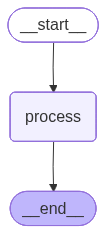

In [ ]:
## 🔧 Passo 3: Construir e Compilar o Grafo

Agora vamos criar nosso primeiro grafo LangGraph!

**O que vamos fazer:**
1. Criar um `StateGraph` com nosso `agentState`
2. Adicionar um nó chamado "process" com nossa função
3. Definir o ponto de entrada
4. Compilar e visualizar

In [ ]:
# Criar o grafo
workflow = StateGraph(agentState)

# Adicionar nó ao grafo
# Aqui dizemos: "tenho um nó chamado 'process' que executa a função process_values"
workflow.add_node("process", process_values)

# Definir ponto de entrada
# O grafo começará sempre no nó "process"
workflow.set_entry_point("process")

# Definir ponto de saída
# O grafo terminará após executar o nó "process"
workflow.set_finish_point("process")

# Compilar o grafo
# Isso converte a definição em uma aplicação executável
app = workflow.compile()

print("✅ Grafo compilado com sucesso!")
print("\n📊 Visualização do grafo:")

# Exibir o grafo como imagem
display(Image(app.get_graph().draw_mermaid_png()))

## 🎯 Passo 4: Testando Nosso Primeiro Workflow

Vamos agora usar nosso grafo! Vamos passar dados de entrada e ver o resultado.

In [ ]:
# Exemplo 1: Entrada simples
print("=" * 60)
print("🚀 EXECUÇÃO 1: Teste Básico")
print("=" * 60)

# Preparar entrada (deve corresponder ao formato de agentState)
entrada = {
    "values": [10, 20, 30],
    "name": "João",
    "result": ""  # Inicialmente vazio
}

print(f"\n📥 Entrada: {entrada}")

# Executar o workflow
resultado = app.invoke(entrada)

print(f"\n📤 Resultado:")
print(f"   {resultado['result']}")
print(f"   (Todos os valores: {resultado['values']})")


In [ ]:
# Exemplo 2: Testando com outro usuário e valores diferentes
print("\n" + "=" * 60)
print("🚀 EXECUÇÃO 2: Outro Teste")
print("=" * 60)

entrada2 = {
    "values": [5, 15, 25, 35, 45],
    "name": "Maria",
    "result": ""
}

print(f"\n📥 Entrada: {entrada2}")

resultado2 = app.invoke(entrada2)

print(f"\n📤 Resultado:")
print(f"   {resultado2['result']}")


## 📋 Resumo: O Que Aprendemos

### Conceitos-Chave:

| Conceito | Descrição |
|----------|-----------|
| **TypedDict** | Define a estrutura do estado de forma simples e nativa do Python |
| **StateGraph** | A classe que cria um grafo computacional |
| **Nó (Node)** | Uma função que processa o estado |
| **Estado** | Os dados compartilhados entre os nós |
| **Invoke** | Executa o grafo com dados de entrada |

### Fluxo Geral:
```
┌─────────────────┐
│  Dados Entrada  │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│  StateGraph     │
│  - Definir nó   │
│  - Entry Point  │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│  Compilar       │
│  app.compile()  │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│  Executar       │
│  app.invoke()   │
└────────┬────────┘
         │
         ▼
┌─────────────────┐
│  Dados Saída    │
└─────────────────┘
```

### Próximos Passos:
- Adicionar múltiplos nós ao grafo
- Usar condições para rotear entre nós
- Integrar com LLMs (Modelos de Linguagem)
- Usar Model Context Protocol (MCP)